In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("learn_evaluting_NoiseInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.010610,0.103551,0.042186,0.370085
1,0,1,0.010666,0.114224,0.046136,0.334767
2,0,2,0.008613,0.090565,0.034175,0.287375
3,0,3,0.007141,0.123112,0.029982,0.340981
4,0,4,0.007187,0.122375,0.029774,0.345417


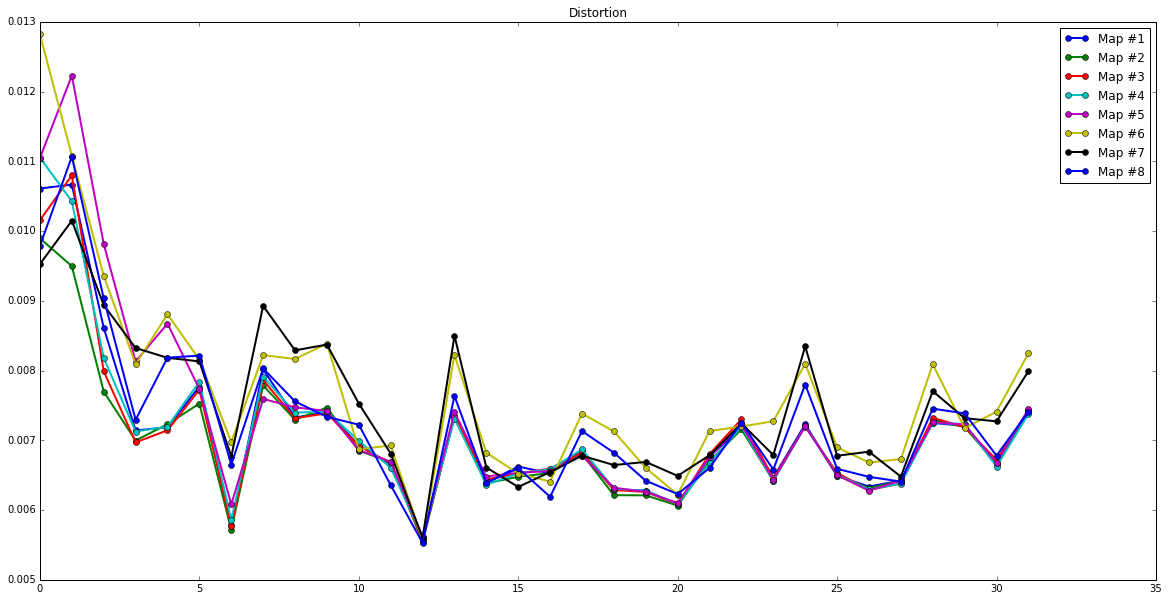

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

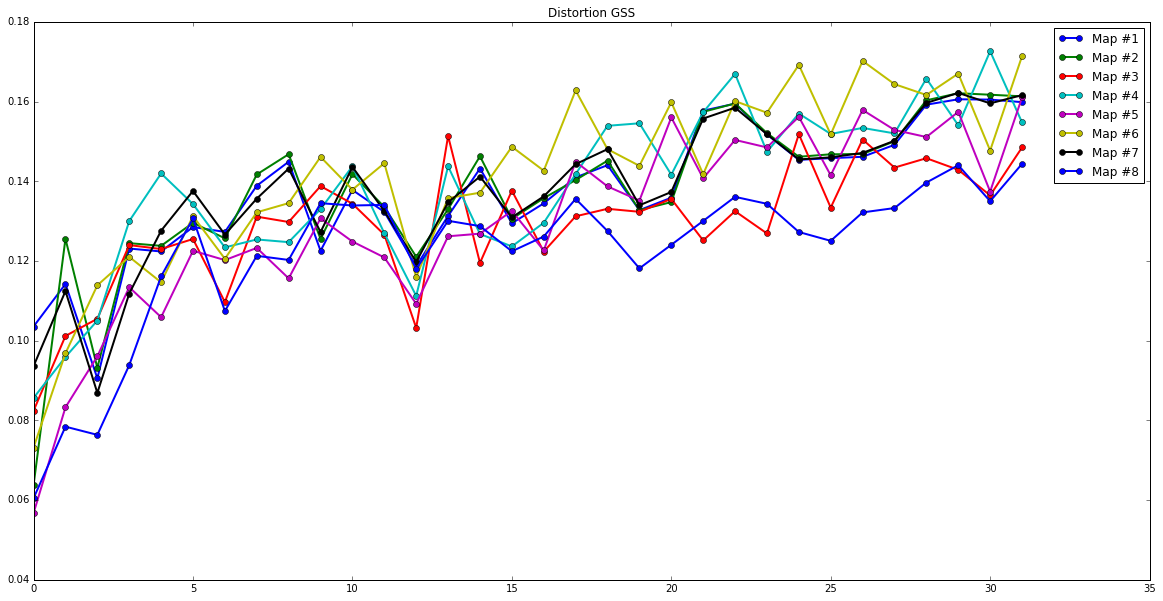

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

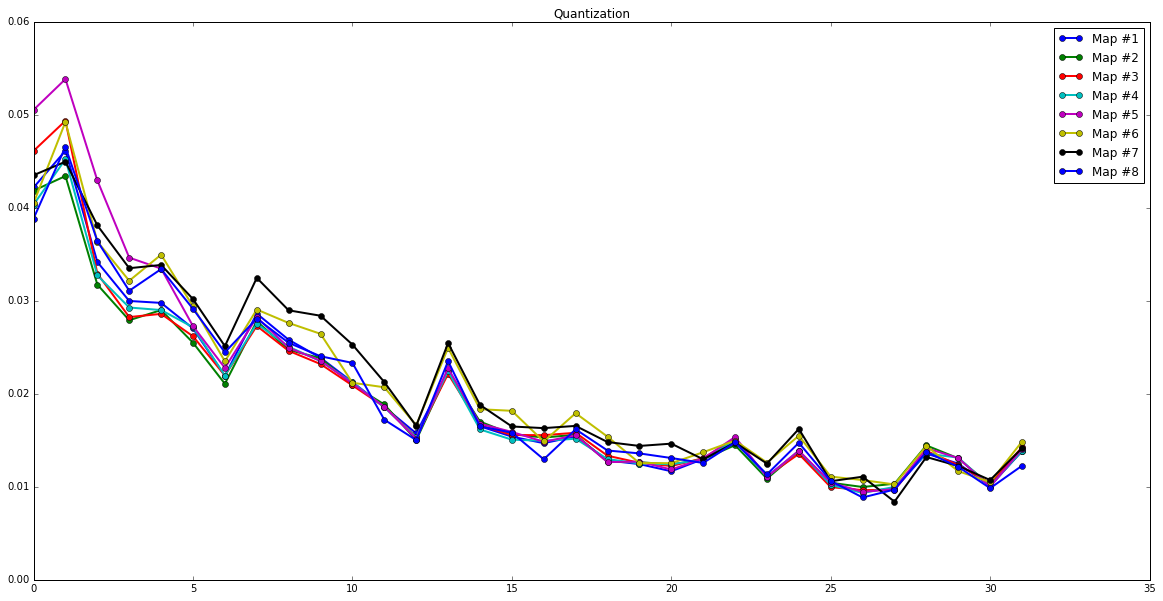

In [6]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

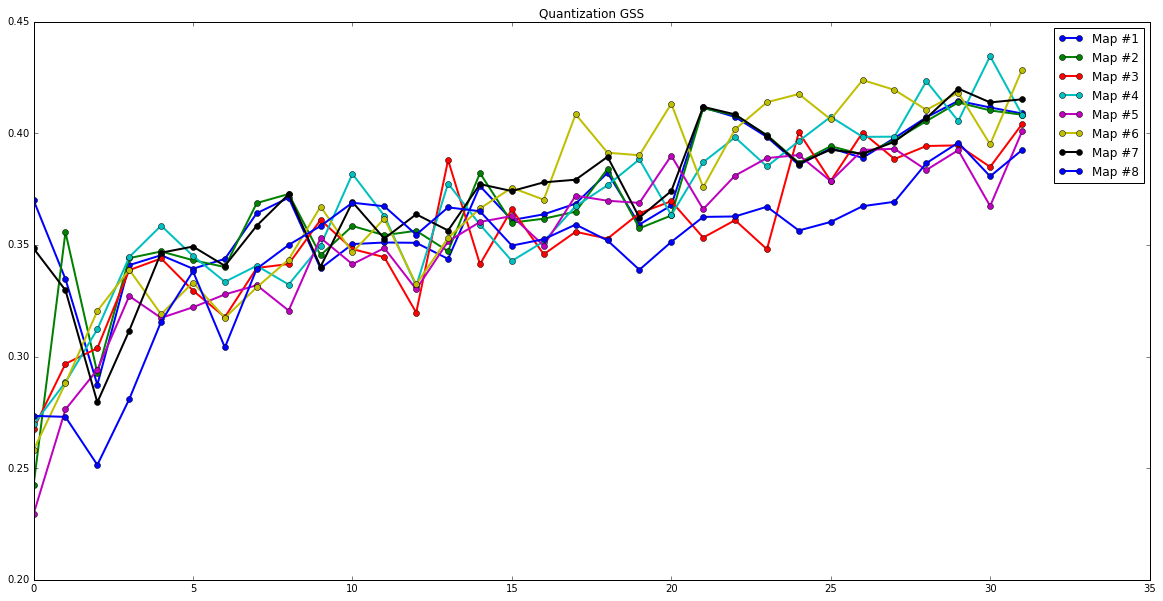

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [8]:
df_v = pd.read_csv("valid_evaluting_NoiseInj.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.012227,0.115819,0.054575,0.389093
1,0,1,0.009276,0.115977,0.045430,0.343154
2,0,2,0.007295,0.103120,0.030412,0.308273
3,0,3,0.006266,0.134628,0.022389,0.364898
4,0,4,0.006816,0.123147,0.023643,0.350225


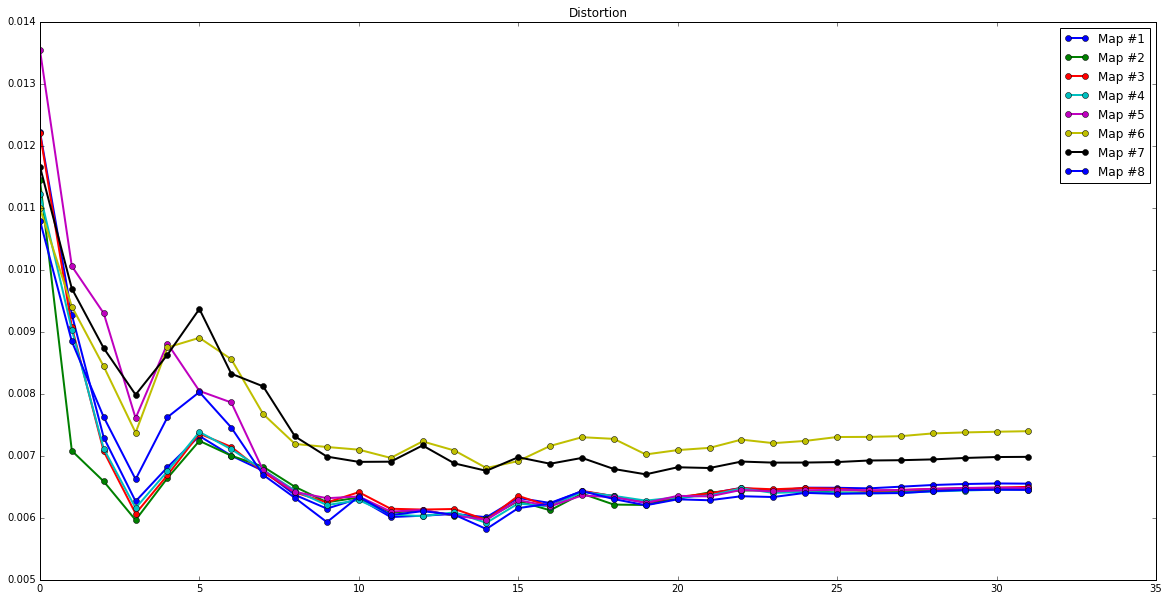

In [9]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

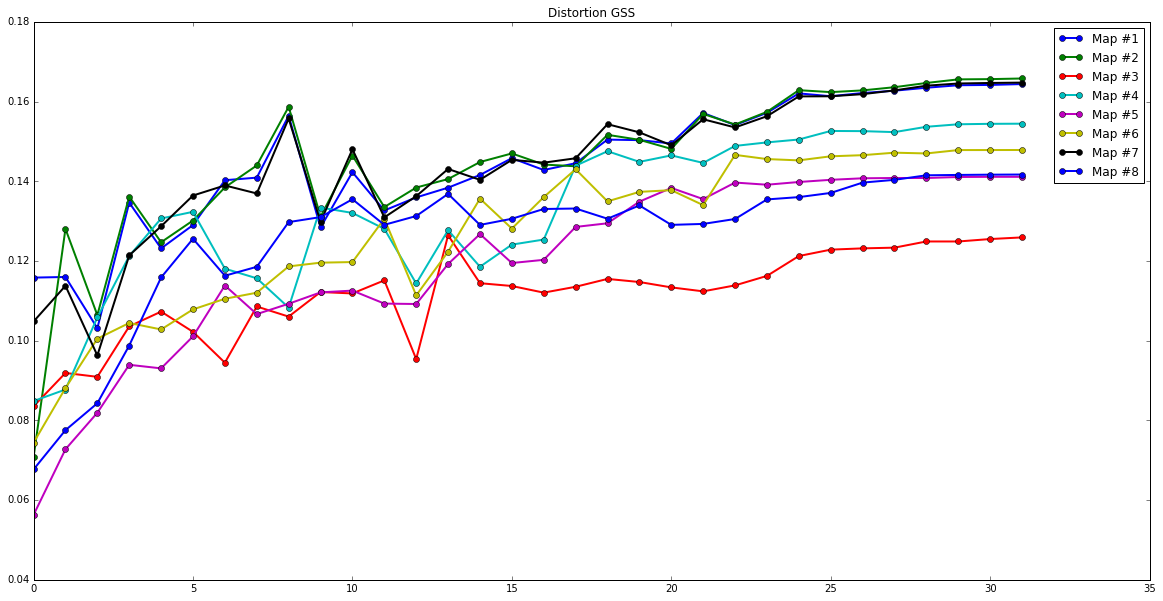

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

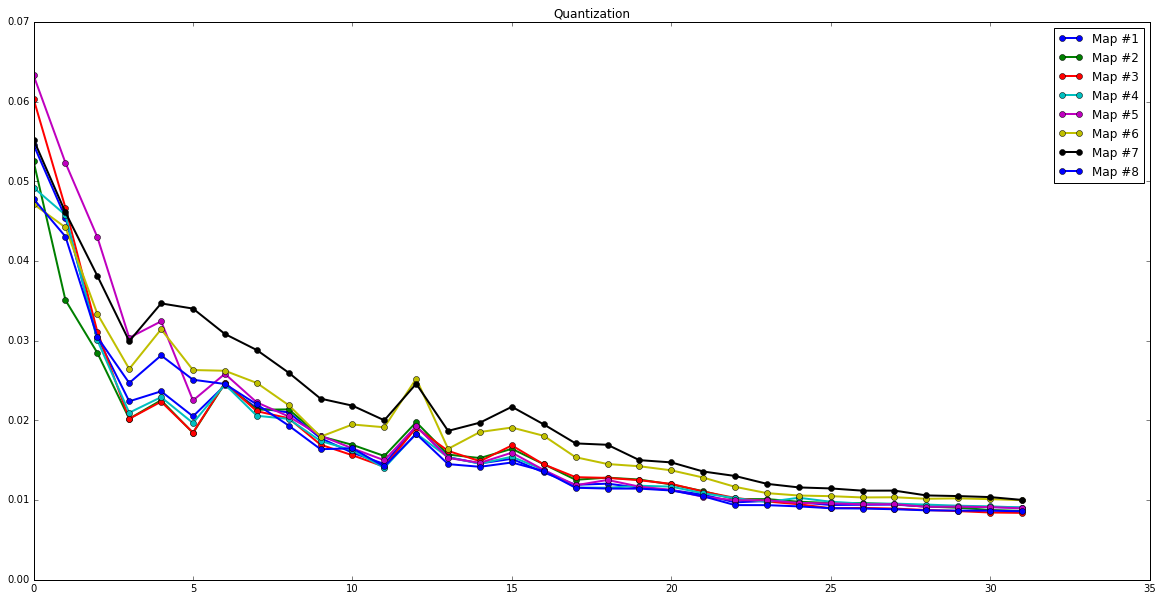

In [11]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

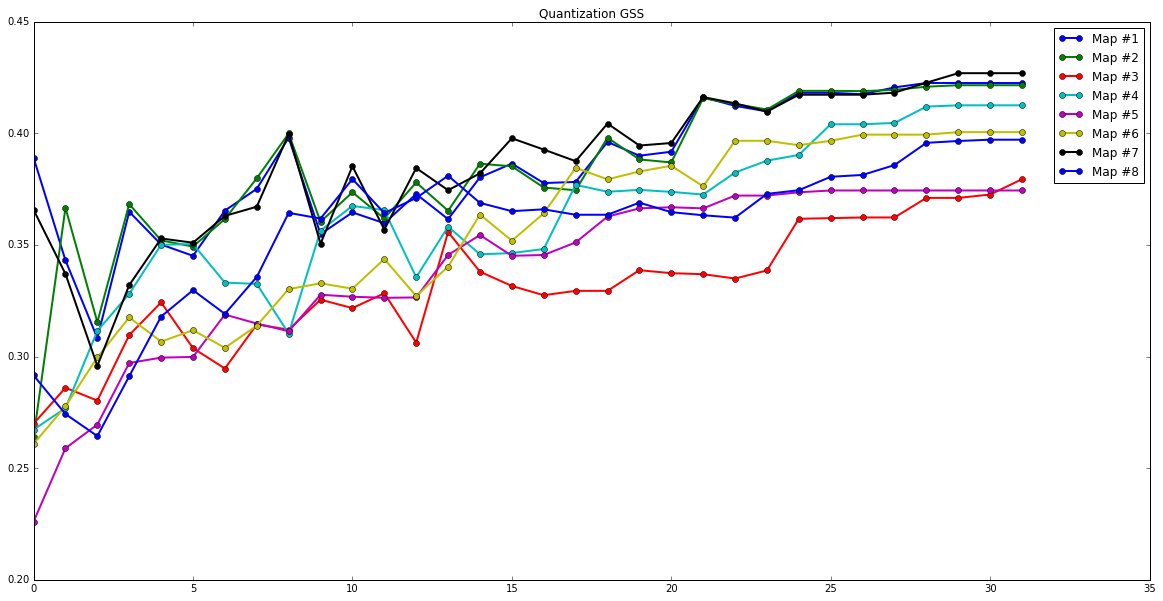

In [12]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [13]:
df_s = pd.read_csv("statistics_NoiseInj.txt", sep=';')
df_s

,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
0,0,0.01636,0.408947,0.016360,0.408947,0.008133,0.16144,0.008133,0.161440,0.000949,0.013488,0.000949,0.013488,0.000364,0.008563,0.000364,0.008563
1,1,0.01636,0.408947,0.012362,0.418397,0.008133,0.16144,27.582334,27.424622,0.000949,0.013488,0.001097,0.057112,0.000364,0.008563,4.012082,21.603977
2,2,0.01636,0.408947,0.011916,0.424283,0.008133,0.16144,57.283548,57.162898,0.000949,0.013488,0.000834,0.074549,0.000364,0.008563,5.090809,30.416494
3,3,0.01636,0.408947,0.012055,0.430014,0.008133,0.16144,85.957975,94.107991,0.000949,0.013488,0.000719,0.071622,0.000364,0.008563,6.690492,38.137024
4,4,0.01636,0.408947,0.012488,0.431717,0.008133,0.16144,118.058130,116.680821,0.000949,0.013488,0.000851,0.079054,0.000364,0.008563,8.793546,43.507900
5,5,0.01636,0.408947,0.013192,0.422358,0.008133,0.16144,148.585148,145.380694,0.000949,0.013488,0.000871,0.086020,0.000364,0.008563,10.170393,45.142170
6,6,0.01636,0.408947,0.014003,0.446686,0.008133,0.16144,181.332098,178.423327,0.000949,0.013488,0.000942,0.102632,0.000364,0.008563,11.205147,50.979263
7,7,0.01636,0.408947,0.014851,0.433519,0.008133,0.16144,215.314674,212.374964,0.000949,0.013488,0.000975,0.097811,0.000364,0.008563,11.426636,55.136162
8,8,0.01636,0.408947,0.015912,0.441512,0.008133,0.16144,252.745909,263.662188,0.000949,0.013488,0.001043,0.101934,0.000364,0.008563,12.841456,66.056747
9,9,0.01636,0.408947,0.016970,0.451539,0.008133,0.16144,287.082091,286.874666,0.000949,0.013488,0.001085,0.114651,0.000364,0.008563,15.047349,71.982422


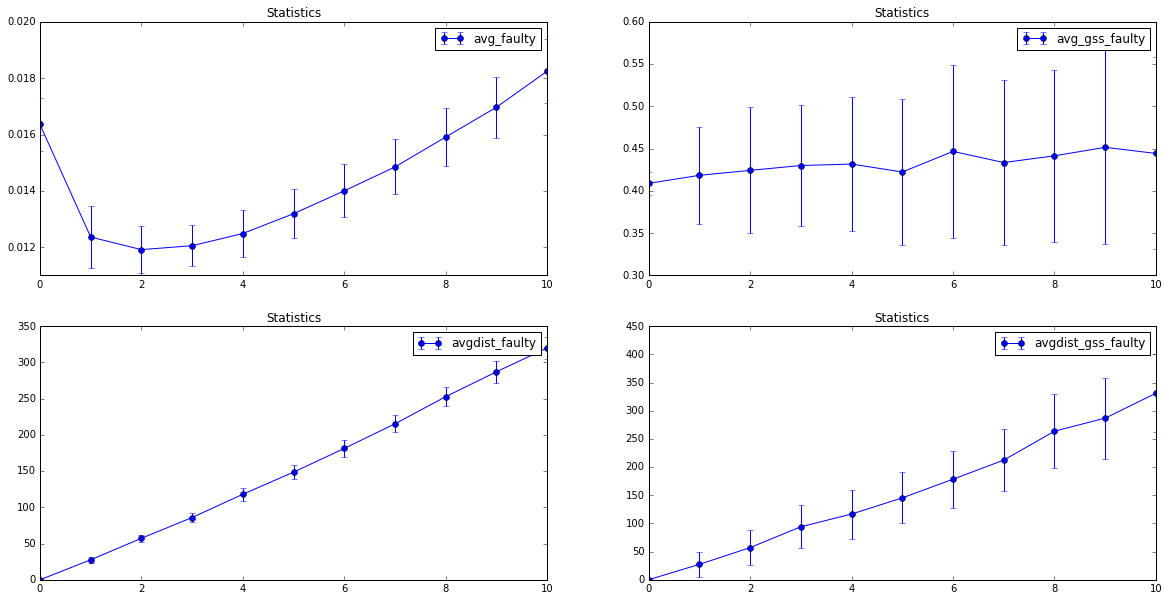

In [14]:
avg = df_s.filter(regex=".*_faulty").filter(regex="avg.*")
clm_num = len(avg.columns)
avg = avg.__iter__()
stddev = df_s.filter(regex=".*_faulty").filter(regex="stddev.*").__iter__()

width = 20
height = 10
plt.figure(figsize=(width, height))

for i in range(0,clm_num):
    plt.subplot(clm_num/2,2,i+1)
    plt.title('Statistics')
    plt.errorbar(range(0,len(df_s)), df_s[avg.__next__()], yerr=df_s[stddev.__next__()], fmt='-o')
    plt.legend()